In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['train.csv', 'gender_submission.csv', 'test.csv']


# **Importing Libraries**

In [2]:
import numpy as np
import pandas as pd
import re as re
import matplotlib.pyplot as plt
import seaborn as sns



# **Reading Data**

In [3]:
train = pd.read_csv('../input/train.csv')
test  = pd.read_csv('../input/test.csv' )
full_data = [train, test]

print (train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
None


In [ ]:
#Columns with missing values: Age,Cabin,Embarked

# **Classification** 


**based on PClass:**

In [4]:
print (train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean()) 


   Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363


**based on Sex:**

In [5]:
print (train[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean())


      Sex  Survived
0  female  0.742038
1    male  0.188908


**based on Family size:**

In [6]:
for dataset in full_data:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1  #total members of family
print (train[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean())

   FamilySize  Survived
0           1  0.303538
1           2  0.552795
2           3  0.578431
3           4  0.724138
4           5  0.200000
5           6  0.136364
6           7  0.333333
7           8  0.000000
8          11  0.000000


**based on is the person alone or has a family:**

In [7]:
for dataset in full_data:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1
print (train[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean())

   IsAlone  Survived
0        0  0.505650
1        1  0.303538


**based on Embarkment:**

In [8]:
for dataset in full_data:
    dataset['Embarked'] = dataset['Embarked'].fillna('S')      #filling missing values
print (train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean())

  Embarked  Survived
0        C  0.553571
1        Q  0.389610
2        S  0.339009


**based on Fare;**

In [9]:
for dataset in full_data:
    dataset['Fare'] = dataset['Fare'].fillna(train['Fare'].median())  #filling missing values
train['grpFare'] = pd.qcut(train['Fare'], 4)                          #creating grpFare size of 4 
print (train[['grpFare', 'Survived']].groupby(['grpFare'], as_index=False).mean())

           grpFare  Survived
0   (-0.001, 7.91]  0.197309
1   (7.91, 14.454]  0.303571
2   (14.454, 31.0]  0.454955
3  (31.0, 512.329]  0.581081


**based on Age:**

In [10]:
for dataset in full_data:
    dataset['Age'] = dataset['Age'].fillna(train['Age'].median())     #filling missing values
train['grpAge'] = pd.cut(train['Age'], 5)                             #making 5 ageGrps of same age diffenerence
print (train[['grpAge', 'Survived']].groupby(['grpAge'], as_index=False).mean())

             grpAge  Survived
0    (0.34, 16.336]  0.550000
1  (16.336, 32.252]  0.344168
2  (32.252, 48.168]  0.404255
3  (48.168, 64.084]  0.434783
4    (64.084, 80.0]  0.090909


# **Visualizations**

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


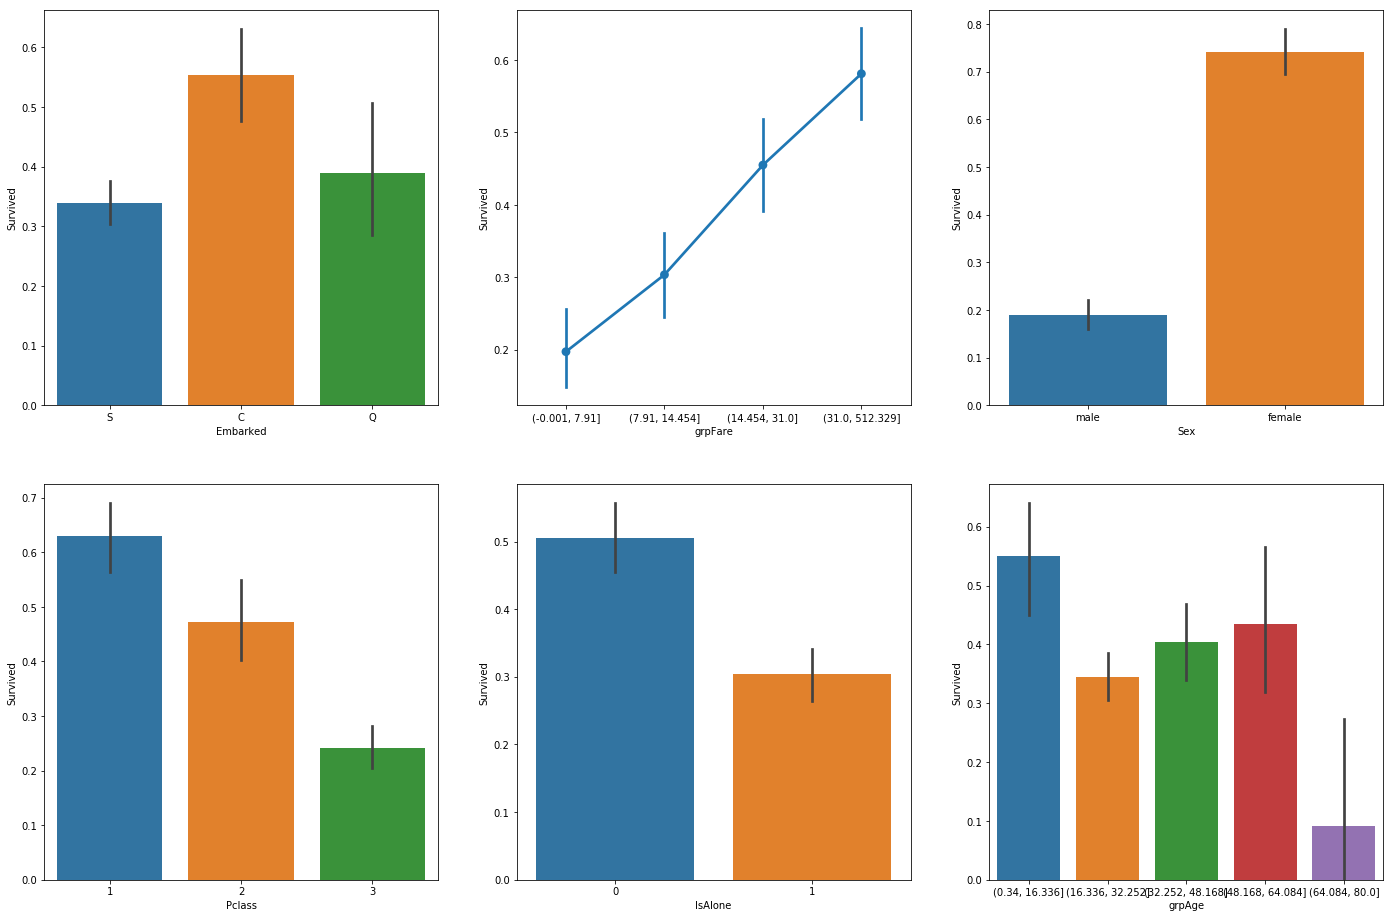

In [11]:
fig, saxis = plt.subplots(2,3,figsize=(24,16))

sns.barplot(x = 'Embarked', y = 'Survived', data=train,ax = saxis[0,0])
sns.pointplot(x = 'grpFare', y = 'Survived', data=train,ax = saxis[0,1])
sns.barplot(x = 'Sex', y = 'Survived', data=train,ax = saxis[0,2])
sns.barplot(x = 'Pclass', y = 'Survived', data=train,ax = saxis[1,0])
sns.barplot(x = 'IsAlone', y = 'Survived', data=train,ax = saxis[1,1])
sns.barplot(x = 'grpAge', y = 'Survived', data=train,ax = saxis[1,2])

# **Inferences:**


* According to groupFare about 60 percent of the rich (who purchased costly tickets ) survived whereas only 20 percent who were poor  (who purchased cheap tickets ) . 
* According to Sex classification more than 55 percent of females survived than males onboard.
* According to IsAlone graph, we can see that 20 percent more people with a family survived than who were alone.
* By seeing GrpAge graph about 55 percent of people less than or equal to 16 years survived and only 10 percent of the people with age more than 64 survived .
* People with Upper SES (Socio Economic Class ) have a survival percentage of more than 60 percent and Lower SES with around 20 percent.
* People who embarked at Cherbourg suvived  with a survival percentage of more than 50 percent and least survival percentage were of the people who embarked at Southampton. 
